In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [2]:
#Reading hdr and img files Seperately#
arr_hdrVH= []
arr_hdrVV= []
arr_imgVH= []
arr_imgVV= []
for file in os.listdir():
    if file.endswith(".hdr") and file[8]== 'H':
          arr_hdrVH= np.append(arr_hdrVH, file)
    if file.endswith(".hdr") and file[8]== 'V':
          arr_hdrVV= np.append(arr_hdrVV, file)
    if file.endswith(".img") and file[8]== 'H':
          arr_imgVH= np.append(arr_imgVH, file)
    if file.endswith(".img") and file[8]== 'V':
          arr_imgVV= np.append(arr_imgVV, file)
  
               

In [17]:
#SORTING FILE ARRAYS IN DATE-ORDER#

#For viewing full data frame:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#HDR-VH
arr_hdrVH_split = np.empty([1,6], str)                                #For spliting into seperate naming parts
for i in range(0, len(arr_hdrVH)):
    under_split     = arr_hdrVH[i].split('_')                         #Spliting all the underscores
    per_split       = under_split[-1].split('.')                      #Spliting the file extension
    tot_split       = np.append(under_split[0:4], per_split)          #Appending the full (split) file name
    arr_hdrVH_split = np.append(arr_hdrVH_split, [tot_split], axis=0) #Making matrix of all filenames
    
df_hdrVH         = pd.DataFrame(arr_hdrVH_split[1:])                  #Converting Matrix to dataframe
df_hdrVH.columns = ['', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Type'] 
df_hdrVH['Date'] = pd.to_datetime(df_hdrVH.Date)                      #Converting dates to datetime format
df_hdrVH.sort_values(by=['Date'], ignore_index=True, inplace=True)    #Sorting by dates, ignore~sets ascending index
                                                                      #& inplace~saves newly sorted dataframe
#HDR-VV
arr_hdrVV_split = np.empty([1,6], str)
for i in range(0, len(arr_hdrVV)):
    under_split     = arr_hdrVV[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_hdrVV_split = np.append(arr_hdrVV_split, [tot_split], axis=0)
    
df_hdrVV         = pd.DataFrame(arr_hdrVV_split[1:])
df_hdrVV.columns = ['', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Type'] 
df_hdrVV['Date'] = pd.to_datetime(df_hdrVV.Date)
df_hdrVV.sort_values(by=['Date'], ignore_index=True, inplace=True)

#IMG-VH
arr_imgVH_split = np.empty([1,6], str)
for i in range(0, len(arr_imgVH)):
    under_split     = arr_imgVH[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_imgVH_split = np.append(arr_imgVH_split, [tot_split], axis=0)
    
df_imgVH         = pd.DataFrame(arr_imgVH_split[1:])
df_imgVH.columns = ['', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Type'] 
df_imgVH['Date'] = pd.to_datetime(df_imgVH.Date)
df_imgVH.sort_values(by=['Date'], ignore_index=True, inplace=True)

#IMG-VV
arr_imgVV_split = np.empty([1,6], str)
for i in range(0, len(arr_imgVV)):
    under_split     = arr_imgVV[i].split('_')
    per_split       = under_split[-1].split('.')
    tot_split       = np.append(under_split[0:4], per_split)
    arr_imgVV_split = np.append(arr_imgVV_split, [tot_split], axis=0)
    
df_imgVV        = pd.DataFrame(arr_imgVV_split[1:])
df_imgVV.columns= ['', 'Polarization', 'Intensity [units]', 'Order #', 'Date', 'File Type'] 
df_imgVV['Date'] = pd.to_datetime(df_imgVV.Date)
df_imgVV.sort_values(by=['Date'], ignore_index=True, inplace=True)


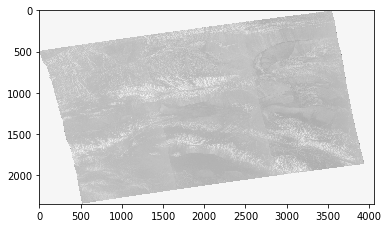

In [161]:
input_filename = 'Sigma0_VH_db_slv107_27Jan2019.img'
shape= (2347, 4064) # matrix size- row, columns
dtype = np.dtype('>f') # big-endian float
output_filename = "JPCLN001.PNG"

fid = open(input_filename, 'rb')
data = np.fromfile(fid, dtype)
image = data.reshape(shape)

# Display.
plt.imshow(image, cmap = "gray")
#plt.savefig(output_filename)
plt.show()


In [ ]:
#Generating odd/even arrays
odd  = []
even = []
for i in range(1, 2*len(arr_hdrVV)):
    if i % 2 == 0:
        even = np.append(even, i)
    else:
        odd = np.append(odd, i)